<a href="https://colab.research.google.com/github/SUSHOVAN95/ML-Assignments/blob/main/ASSGN5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from  google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/flower.zip"

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,BatchNormalization
from keras.layers import Dense
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from PIL import Image

Using TensorFlow backend.


In [ ]:
import os
files = os.listdir("train/")
files
files.sort()
files

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
train = ImageDataGenerator(rescale=1./255,
horizontal_flip=True,
shear_range=0.2,
zoom_range=0.2,
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode='nearest',
validation_split=0.2)

valid = ImageDataGenerator(rescale=1./255)


test = ImageDataGenerator(rescale=1./255)
                           

img_size = 120
batch_size = 128

In [ ]:
trainset = train.flow_from_directory("train/",
target_size = (img_size, img_size),
batch_size = batch_size,
shuffle=True,
seed=42,
color_mode='rgb',
class_mode='categorical')

validset = valid.flow_from_directory("valid/",
target_size = (img_size, img_size),
batch_size = batch_size,
shuffle=True,
seed=42,
color_mode='rgb',
class_mode = 'categorical')

testset = test.flow_from_directory("test/",
target_size = (img_size, img_size),
batch_size = batch_size,
shuffle=True,
seed=42,
color_mode='rgb',
class_mode = 'categorical')

Found 3449 images belonging to 5 classes.
Found 437 images belonging to 5 classes.
Found 437 images belonging to 5 classes.


In [ ]:
def predimage(path):
    test = image.load_img(path,target_size=(120,120))
    plt.imshow(test)
    test = image.img_to_array(test)
    test = np.expand_dims(test,axis=0)
    result = model.predict(test)
    y_class = result.argmax(axis=-1)
    print(files[y_class[0]])

In [ ]:
trainset = train.flow_from_directory("train/",
target_size = (img_size, img_size),
batch_size = batch_size,
shuffle=True,
seed=42,
color_mode='grayscale',
class_mode='categorical')

validset = valid.flow_from_directory("valid/",
target_size = (img_size, img_size),
batch_size = batch_size,
shuffle=True,
seed=42,
color_mode='grayscale',
class_mode = 'categorical')

testset = test.flow_from_directory("test/",
target_size = (img_size, img_size),
batch_size = batch_size,
shuffle=True,
seed=42,
color_mode='grayscale',
class_mode = 'categorical')

Found 3449 images belonging to 5 classes.
Found 437 images belonging to 5 classes.
Found 437 images belonging to 5 classes.


In [ ]:
gmodel = Sequential()

gmodel.add(Convolution2D(filters=32,kernel_size=(3,3),input_shape=(120,120,1),activation='relu'))
gmodel.add(BatchNormalization())
gmodel.add(MaxPooling2D(pool_size=(2, 2)))

gmodel.add(Convolution2D(filters=64,kernel_size=(3,3),activation='relu'))
gmodel.add(BatchNormalization())
gmodel.add(MaxPooling2D(pool_size=(2, 2)))

gmodel.add(Convolution2D(filters=128,kernel_size=(3,3),activation='relu'))
gmodel.add(BatchNormalization())
gmodel.add(MaxPooling2D(pool_size=(2, 2)))


gmodel.add(Flatten())
gmodel.add(BatchNormalization())
gmodel.add(Dense(output_dim=500,activation='relu'))

gmodel.add(Dense(output_dim=5,activation='softmax'))
gmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=500)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=5)`


In [ ]:
history = gmodel.fit_generator(generator = trainset,
                    epochs = 500,
                    steps_per_epoch=32,
                    validation_data = validset,
                    validation_steps = 4
                   )

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
32/32 [==============================] - 19s 603ms/step - loss: 9.4568 - acc: 0.3330 - val_loss: 10.9605 - val_acc: 0.2975
Epoch 2/500
32/32 [==============================] - 18s 552ms/step - loss: 9.9408 - acc: 0.3519 - val_loss: 11.2091 - val_acc: 0.2998
Epoch 3/500
32/32 [==============================] - 17s 523ms/step - loss: 9.1694 - acc: 0.3866 - val_loss: 11.2080 - val_acc: 0.2929
Epoch 4/500
32/32 [==============================] - 17s 542ms/step - loss: 8.8556 - acc: 0.4136 - val_loss: 11.4796 - val_acc: 0.2746
Epoch 5/500
32/32 [==============================] - 16s 489ms/step - loss: 8.5308 - acc: 0.4153 - val_loss: 8.9955 - val_acc: 0.3341
Epoch 6/500
32/32 [==============================] - 16s 499ms/step - loss: 7.0808 - acc: 0.4204 - val_loss: 7.3425 - val_acc: 0.3478
Epoch 7/500
32/32 [==============================] - 17s 529ms/step - loss: 5.8118 - acc: 0.4043 - val_loss: 2.8355 - val_acc: 0.2654
Epoch 8/50

In [ ]:
score = gmodel.evaluate_generator(testset,steps=100)
print("Test Loss = ",score[0])
print("Test Accuracy = ",score[1])

Test Loss =  3.2861323147343824
Test Accuracy =  0.693363844633648


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


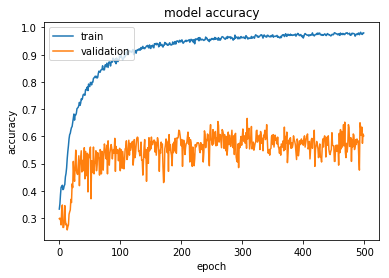

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

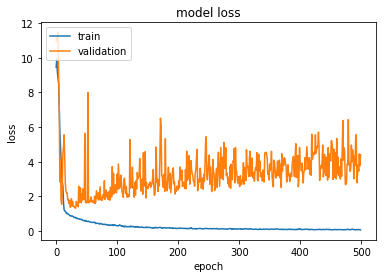

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
gmodel.save('graymodel.h5')

In [ ]:
with open('grayhistory', 'wb') as f:
    pickle.dump(history.history, f)